In [1]:
# layer in neural network they are 3 layer in this
# input data
# Hidden Layer
# Output Layer

In [3]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
#import importlib as plt # Remove or comment out this line, it overwrites the intended plt alias
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.optim as optim

In [4]:
class Model(nn.Module):
  def __init__(self,in_feature = 4,h1 = 8,h2 = 8,Output_feature = 3 ):
    super().__init__()

    self.fc1 = nn.Linear(in_feature,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc4 = nn.Linear(h2,Output_feature)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc4(x)

    return x

In [ ]:
torch.manual_seed(70)

model = Model()

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

my_df = pd.read_csv(url)


In [ ]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
my_df ['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df ['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df ['variety'] = my_df['variety'].replace('Virginica',2.0)

my_df

<ipython-input-7-ea852a6af4ce>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df ['variety'] = my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
x = my_df.drop('variety',axis = 1) # Changed axis to 1 to drop the 'variety' column
y = my_df['variety']

In [ ]:
x = x.values
y = y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41)

In [ ]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 2)

In [ ]:

epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"Epoch {i} adn losses {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 adn losses 1.1074143648147583
Epoch 10 adn losses 165.46609497070312
Epoch 20 adn losses 2.257875680923462
Epoch 30 adn losses 1.9164462089538574
Epoch 40 adn losses 1.6052372455596924
Epoch 50 adn losses 1.8840413093566895
Epoch 60 adn losses 1.6753371953964233
Epoch 70 adn losses 1.317694902420044
Epoch 80 adn losses 1.3656240701675415
Epoch 90 adn losses 1.5140268802642822


Text(0.5, 0, 'Epochs')

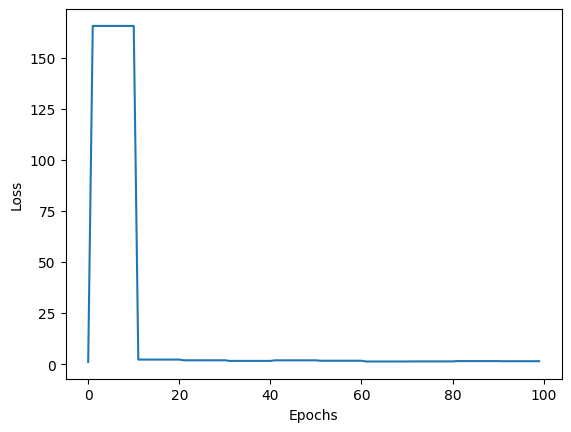

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')